Code: `yolox-m.ipynb`

FOLD2


___
Issues:
    
   * How to change evaluation from AP to F2 ?
   * Augmentation - How to increase augmentation without Mosiac - **NOT POSSIBLE!!**
   
Plans:
* FOLD3 performs better than FOLD0 !!
* Keep trying to improve CV-Strategy!! 
___

* Version 12(LB=.???):** v1 + `FOLD4` + `yoloxwarmcos` + `img=(864, 1536)(x1.2)`

* Version 11(LB=.410):** v1 + `FOLD2` + `yoloxwarmcos` + `img=(864, 1536)(x1.2)`

   * lr = [8.6e-5, 3.9e-4, 9.2e-4, 5e-5, 5e-5] 
   * AP = [.325, .343, .294, .373, .378]
   * AR = [.448, .431, .392, .445, .448]
   
* **Version 10(`LB=.448/.575`):** v1 + `FOLD3` + `yoloxwarmcos` + `img=(864, 1536)(x1.2)`

    * lr = [9.4e-5, 4e-4, 9.45e-4, 5e-5, 5-e5]
    * AP = [.361, .442, .446, .539, .549]
    * AR = [.483, .543, .541, .616, .624]

___

`IMG_SIZE = (800, 1280)`
___

___
**Version 1(LB = .431/.569):** `img=(800, 1280)` + `max_epoch = 5` + `yoloxwarmcos` + `seed = 42` + `lr = 1e-3` + `EMA:ON`  + `randomly sampled 500 UN-ANN for Tr + 1000 samples for Val`.
   * lr = [8.6e-5, 3.9e-4, 9.2e-4, 5e-5, 5e-5] 
   * AP = [.308, .308, .273, `.344`, .343]
   * AR = [.425, .423, .345, `.412`, .403]
   * LB:
       * `.431` for infer img = (800, 1280)
       * `.569` for infer img = (1088, 1920) x1.4
   * Remark:
       * Try training with `warmcos` 


___              

## Training Parameters:

   * model: `yolox-m-fold2`; 
   * Backbone: `DarkNet-53`
   * DataLoader: `batch-size` = 12 ;
   * Optimizer: `yoloxwarmcos`
   * Scheduler: `lr` = 1.0e-03; `warmup` = 3 
   * Size: `image_size` = (800, 1280); `test_size` = (800, 1280)
   * Dataset: 3
   * Evaluation: `confth`= 0.01, `nsmthe` = .65
   * Inference: `confth`= 0.05, `nsmthe` = .25
   * Augmentations: Mosiac: OFF; MixUp: OFF
   * EMA : `ON`  #Increase AP: self.ema_model = ModelEMA(model, 0.9998) 
___

## References & Background info. : 

* [Baseline YoloX by Reme](https://www.kaggle.com/remekkinas/yolox-training-pipeline-cots-dataset-lb-0-507?scriptVersionId=81161499)
 
* [[yolox_base.py](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/yolox/exp/yolox_base.py), [config file doc](https://github.com/Megvii-BaseDetection/YOLOX/tree/main/docs), [lr_scheduler.py](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/yolox/utils/lr_scheduler.py), [manipulate training image size](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/docs/manipulate_training_image_size.md)]

* Non Maximum Supression - Removes multiple detections of same object: [nms theory](https://towardsdatascience.com/non-maxima-suppression-139f7e00f0b5), [Yolox NMS Code](https://github.com/Megvii-BaseDetection/YOLOX/blob/main/yolox/utils/demo_utils.py)
___



Plot the results

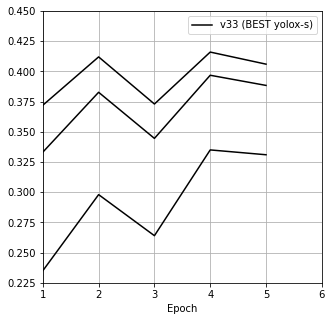

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Version 33 (BEST LB so far)
Epoch_v33 = np.arange(5) + 1
AP_v33 = [.235, .298, .264, .335, .331]
AR_v33 = [.372, .412, .373, .416, .406]
F2_v33 = [5*ap*ar / (4*ap + ar) for (ap, ar) in zip(AP_v33, AR_v33)]

fig, axes = plt.subplots(1, 1, figsize=(5, 5))

ax = np.ravel(axes)
ax[0].plot(Epoch_v33, AR_v33, 'k', label='v33 (BEST yolox-s)')
ax[0].plot(Epoch_v33, F2_v33, 'k')
ax[0].plot(Epoch_v33, AP_v33, 'k') 

ax[0].legend()
plt.xlabel('Epoch')

ax[0].set_xlim([1, 6])
ax[0].set_ylim([.225, .45])
ax[0].grid('on')

plt.show()

## Install YoloX online

!git clone https://github.com/Megvii-BaseDetection/YOLOX -q
%cd YOLOX
!pip install -U pip  && pip install -r requirements.txt
!pip install -v -e .  # or  python3 setup.py develop

!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
#pip3 install cython; pip3 install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

## INSTALL YOLOX OFFLINE

In [2]:
# Copy YOLOX and required modules from local repository (Kaggle dataset -> https://www.kaggle.com/remekkinas/yolox-cots-models)
%cp -r /kaggle/input/yolox-cots-models /kaggle/working/
%cd /kaggle/working/yolox-cots-models/yolox-dep

/kaggle/working/yolox-cots-models/yolox-dep


In [3]:
# Install YOLOX required modules

!pip install pip-21.3.1-py3-none-any.whl -f ./ --no-index
!pip install loguru-0.5.3-py3-none-any.whl -f ./ --no-index
!pip install ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl -f ./ --no-index
!pip install onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl -f ./ --no-index
!pip install onnxruntime-1.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl -f ./ --no-index
!pip install onnxoptimizer-0.2.6-cp37-cp37m-manylinux2014_x86_64.whl -f ./ --no-index
!pip install thop-0.0.31.post2005241907-py3-none-any.whl -f ./ --no-index
!pip install tabulate-0.8.9-py3-none-any.whl -f ./ --no-index
#!pip install onnx-simplifier-0.3.6.tar.gz -f ./ --no-index


Looking in links: ./
Processing ./pip-21.3.1-py3-none-any.whl
pip is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Looking in links: ./
Processing ./loguru-0.5.3-py3-none-any.whl
Looking in links: ./
Processing ./ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl
Looking in links: ./
Processing ./onnx-1.8.1-cp37-cp37m-manylinux2010_x86_64.whl
Looking in links: ./
Processing ./onnxruntime-1.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Looking in links: ./
Processing ./onnxoptimizer-0.2.6-cp37-cp37m-manylinux2014_x86_64.whl
Looking in links: ./
Processing ./thop-0.0.31.post2005241907-py3-none-any.whl
Looking in links: ./
Processing ./tabulate-0.8.9-py3-none-any.whl
tabulate is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [4]:
# Install YOLOX
%cd /kaggle/working/yolox-cots-models/YOLOX
!pip install -r requirements.txt
!pip install -v -e . 

/kaggle/working/yolox-cots-models/YOLOX
Using pip 21.3.1 from /opt/conda/lib/python3.7/site-packages/pip (python 3.7)
Obtaining file:///kaggle/working/yolox-cots-models/YOLOX
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-gytucjti/yolox.egg-info
  writing /tmp/pip-pip-egg-info-gytucjti/yolox.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-gytucjti/yolox.egg-info/dependency_links.txt
  writing top-level names to /tmp/pip-pip-egg-info-gytucjti/yolox.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-gytucjti/yolox.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-gytucjti/yolox.egg-info/SOURCES.txt'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-pip-egg-info-gytucjti/yolox.egg-info/SOURCES.txt'
  Preparing metadata (setup.py) ... done
  Running setup.py develop for yolox
    Running command /opt/conda/bin/python3.7 -c 'import io, os, sys, setuptools, tokenize; sy

In [5]:
# Install CocoAPI tool
%cd /kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI

!make
!make install
!python setup.py install

/kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /kaggle/working/yolox-cots-models/yolox-dep/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
gcc -pthread -B /opt/conda/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/opt/conda/lib/python3.7/site-packages/numpy/core/include -I../common -I/opt/conda/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7/../common/maskApi.o -Wno-cpp -Wno-unused-function -

In [6]:
import pycocotools

#### Load libraries

In [7]:
import os
import ast
import json
import torch
import random
import numpy as np 
import pandas as pd
from shutil import copyfile

from string import Template

#from torch.utils.data import Dataset as BaseDataset, DataLoader

PATH_REEF = '/kaggle/input/tensorflow-great-barrier-reef'
PATH_IMAGES = f'{PATH_REEF}/train_images'
PATH_CSV = f'{PATH_REEF}/train.csv'

# CFG

In [8]:

FOLD = 4

BATCH_SIZE = 12

LEARNING_RATE = 1.0e-03 

MAX_EPOCH = 5

WARMUP_EPOCHS = 3 

SEED = 42


### seed_everything

In [9]:
def fix_random_seeds(seed):
    
    random.seed(seed)
    
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    np.random.seed(seed)
    
    torch.manual_seed(seed)
    
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    
    torch.backends.cudnn.benchmark = False  # False
    
if SEED is not None:
    fix_random_seeds(SEED)

#### PREPROCESSING 

Step 1. Prepare the dataset `FOLD2` & `FOLD3` & `FOLD4`

In [10]:
def get_path(image_id):
    vid = image_id.split('-')[0]
    fid = image_id.split('-')[1]
    return f'{PATH_IMAGES}/video_{vid}/{fid}.jpg'

def get_boxes(anns_str):
    ann_list = ast.literal_eval(anns_str)
    return [[a['x'], a['y'], a['width'], a['height']] for a in ann_list]


df = pd.read_csv(PATH_CSV)

df['num_bbox'] = df.annotations.apply(lambda x: len(ast.literal_eval(x)))
df['bboxes'] = df.annotations.apply(get_boxes)
df['width'] = 1280
df['height'] = 720
df['image_path'] = df.image_id.apply(get_path)

display(df.head(2))

#-------------------------------#
#  FOLD 4
#-------------------------------#
def get_dataset_v3(
    df, 
    num_un_tr_samples=500,
    num_un_val_samples=1000,
    SEED = 42
):
    """
    FOLD 4: Improving FOLD 3
    """
    from sklearn.model_selection import train_test_split

  
    def split_vid0(df_):
        
        df0 = df_[df_.video_id == 0].reset_index(drop=True)
        
        t, v = train_test_split(df0, test_size = 0.15, random_state= SEED)
                      
        train_vid0 = pd.concat([t], ignore_index=True) 
        val_vid0 = pd.concat([v], ignore_index=True) 
                      
        return train_vid0, val_vid0
    
    # Split VID 1
    def split_vid1(df_):
        df1 = df_[df_.video_id == 1].reset_index(drop=True)
        
        #df_s4 = df1[df1.sequence.isin([60510])]
        
        df_s1 = df1[df1.sequence == 15827]
        df_s2 = df1[df1.sequence == 17665]
        df_s3 = df1[df1.sequence == 18048]
        df_s4 = df1[df1.sequence == 60510]
        df_s5 = df1[df1.sequence == 60754]
        df_s6 = df1[df1.sequence == 8503]

        t_s1, v_s1 = train_test_split(df_s1, test_size = 0.05, random_state= SEED)
        t_s2, v_s2 = train_test_split(df_s2, test_size = 0.05, random_state= SEED)
        t_s3, v_s3 = train_test_split(df_s3, test_size = 0.05, random_state= SEED)
        t_s4, v_s4 = train_test_split(df_s4, test_size = 0.05, random_state= SEED)
        t_s5, v_s5 = train_test_split(df_s5, test_size = 0.08, random_state= SEED)
        t_s6, v_s6 = train_test_split(df_s6, test_size = 0.08, random_state= SEED)
                      
        train_vid1 = pd.concat(
            [t_s1, t_s2, t_s3, df_s4, t_s5, t_s6], ignore_index=True
        ) 
        val_vid1 = pd.concat(
            [v_s1, v_s2, v_s3, v_s4, v_s5, v_s6], ignore_index=True
        ) 
                      
        return train_vid1, val_vid1
    
    # Split VID 2
    def split_vid2(df_):
        df2 = df_[df_.video_id == 2].reset_index(drop=True)
        
        df_s1 = df2[df2.sequence == 26651]
        df_s2 = df2[df2.sequence == 29859]
        df_s3 = df2[df2.sequence == 22643]
        
        t_s1, v_s1 = train_test_split(df_s1, test_size=0.1, random_state=SEED)
        t_s2, v_s2 = train_test_split(df_s2, test_size=0.1, random_state=SEED)
        t_s3, v_s3 = train_test_split(df_s3, test_size=0.1, random_state=SEED)
        
        train_vid2 = pd.concat(
            [t_s1, t_s2, t_s3], ignore_index=True
        ) 
        val_vid2 = pd.concat(
            [v_s1, v_s2, v_s3], ignore_index=True
        ) 
        return train_vid2, val_vid2
    
    # Annotated datas
    ann_df = df[df['annotations'] != '[]'].reset_index()
       
    train_vid0, val_vid0 = split_vid0(ann_df)
    train_vid1, val_vid1 = split_vid1(ann_df)
    train_vid2, val_vid2 = split_vid2(ann_df)
                                                
 
    # Un-annotated datas
    un_df = df[df['annotations'] == '[]'].reset_index()  
    train_un, val_un = train_test_split(un_df, test_size = 0.6, random_state=SEED)
    
    train_un = train_un.sample(n=num_un_tr_samples, random_state=SEED).reset_index(drop=True)
    val_un   = val_un.sample(n=num_un_val_samples, random_state=SEED).reset_index(drop=True)  
    
    df_train = pd.concat([train_vid0, train_vid1, train_vid2, train_un], ignore_index=True)
    
    df_val = pd.concat([val_vid0, val_vid1, val_vid2, val_un], ignore_index=True)
   
    return df_train, df_val



def get_dataset_v2(
    df, 
    num_un_tr_samples=500,
    num_un_val_samples=1000,
    SEED = 42
):
    """
    FOLD 3
    """
    from sklearn.model_selection import train_test_split

  
    def split_vid0(df_):
        
        df0 = df_[df_.video_id == 0].reset_index(drop=True)
        
        t, v = train_test_split(df0, test_size = 0.1, random_state= SEED)
                      
        train_vid0 = pd.concat([t], ignore_index=True) 
        val_vid0 = pd.concat([v], ignore_index=True) 
                      
        return train_vid0, val_vid0
    
    # Split VID 1
    def split_vid1(df_):
        df1 = df_[df_.video_id == 1].reset_index(drop=True)
        
        df_s1234 = df1[
            df1.sequence.isin([15827, 17665, 18048, 60510])
        ]
        df_s5 = df1[df1.sequence == 60754]
        df_s6 = df1[df1.sequence == 8503]

        t_s5, v_s5 = train_test_split(df_s5, test_size = 0.1, random_state= SEED)
        t_s6, v_s6 = train_test_split(df_s6, test_size= 0.1, random_state= SEED)
                      
        train_vid1 = pd.concat(
            [df_s1234, t_s5, t_s6], ignore_index=True
        ) 
        val_vid1 = pd.concat(
            [v_s5, v_s6], ignore_index=True
        ) 
                      
        return train_vid1, val_vid1
    
    # Split VID 2
    def split_vid2(df_):
        df2 = df_[df_.video_id == 2].reset_index(drop=True)
        
        df_s1 = df2[df2.sequence == 26651]
        df_s2 = df2[df2.sequence == 29859]
        df_s3 = df2[df2.sequence == 22643]
        
        t_s1, v_s1 = train_test_split(df_s1, test_size=0.7, random_state=SEED)
        t_s2, v_s2 = train_test_split(df_s2, test_size=0.7, random_state=SEED)
        t_s3, v_s3 = train_test_split(df_s3, test_size=0.7, random_state=SEED)
        
        train_vid2 = pd.concat(
            [t_s1, t_s2, t_s3], ignore_index=True
        ) 
        val_vid2 = pd.concat(
            [v_s1, v_s2, v_s3], ignore_index=True
        ) 
        return train_vid2, val_vid2
    
    # Annotated datas
    ann_df = df[df['annotations'] != '[]'].reset_index()
       
    train_vid0, val_vid0 = split_vid0(ann_df)
    train_vid1, val_vid1 = split_vid1(ann_df)
    train_vid2, val_vid2 = split_vid2(ann_df)
                                                
 
    # Un-annotated datas
    un_df = df[df['annotations'] == '[]'].reset_index()  
    train_un, val_un = train_test_split(un_df, test_size = 0.6, random_state=SEED)
    
    train_un = train_un.sample(n=num_un_tr_samples, random_state=SEED).reset_index(drop=True)
    val_un   = val_un.sample(n=num_un_val_samples, random_state=SEED).reset_index(drop=True)  
    
    df_train = pd.concat([train_vid0, train_vid1, train_vid2, train_un], ignore_index=True)
    
    df_val = pd.concat([val_vid0, val_vid1, val_vid2, val_un], ignore_index=True)
   
    return df_train, df_val


def get_dataset(
    df, 
    VAL_ID, 
    num_un_tr_samples=500,
    num_un_val_samples=1000,
    SEED = 42
):

    # Annotated datas
    ann_df = df[df['annotations'] != '[]'].reset_index()
    # Un-annotated datas
    un_df = df[df['annotations'] == '[]'].reset_index()

    # Select annotated vid's 0 & 1.
    df1 = ann_df[ann_df.video_id != VAL_VID].reset_index(drop=True)

    # Select un-annotated vid's 0 & 1.
    df2 = un_df[un_df.video_id != VAL_VID].reset_index(drop=True)
    # Add un-annotated data for training.
    df2a = df2.sample(n=num_un_tr_samples, random_state=SEED).reset_index(drop=True)
    df_train = pd.concat([df1, df2a], ignore_index=True)

    # Validation data:

    df3 = ann_df[ann_df.video_id == VAL_VID].reset_index(drop=True)
    df4 = un_df[un_df.video_id == VAL_VID].reset_index(drop=True)

    #df_val = pd.concat([df3, df4[:num_un_val_samples]], ignore_index=True)
    # Updated version...
    df_val = pd.concat(
        [df3, df4.sample(n=num_un_val_samples, random_state=SEED).reset_index(drop=True)], 
        ignore_index=True
    )
    return df_train, df_val



if FOLD == 2:
    VAL_VID = 2 
    df_train, df_val = get_dataset(df, VAL_VID)

if FOLD == 3:
    df_train, df_val = get_dataset_v2(df)

if FOLD == 4:
    df_train, df_val = get_dataset_v3(df)


display(df_train.head(2))


,video_id,sequence,video_frame,sequence_frame,image_id,annotations,num_bbox,bboxes,width,height,image_path
0,0,40258,0,0,0-0,[],0,[],1280,720,/kaggle/input/tensorflow-great-barrier-reef/tr...
1,0,40258,1,1,0-1,[],0,[],1280,720,/kaggle/input/tensorflow-great-barrier-reef/tr...


,index,video_id,sequence,video_frame,sequence_frame,image_id,annotations,num_bbox,bboxes,width,height,image_path
0,6283,0,996,11923,498,0-11923,"[{'x': 1084, 'y': 553, 'width': 72, 'height': ...",1,"[[1084, 553, 72, 83]]",1280,720,/kaggle/input/tensorflow-great-barrier-reef/tr...
1,599,0,45518,992,119,0-992,"[{'x': 878, 'y': 303, 'width': 70, 'height': 44}]",1,"[[878, 303, 70, 44]]",1280,720,/kaggle/input/tensorflow-great-barrier-reef/tr...


Step 2. Prepare the `YOLOX` Training/validation Dataset & Move files

In [11]:

HOME_DIR = '/kaggle/working/' 
DATASET_PATH = 'dataset/images'

!mkdir {HOME_DIR}dataset
!mkdir {HOME_DIR}{DATASET_PATH}
!mkdir {HOME_DIR}{DATASET_PATH}/train2017
!mkdir {HOME_DIR}{DATASET_PATH}/val2017
!mkdir {HOME_DIR}{DATASET_PATH}/annotations

# Move files from `Barrier Reef Dataset` folder to `YOLOX` training image folder (`/kaggle/working/dataset`)
for i in range(len(df_train)):
    row = df_train.loc[i]
    copyfile(f'{row.image_path}', f'{HOME_DIR}{DATASET_PATH}/train2017/{row.image_id}.jpg')
    
for i in range(len(df_val)):
    row = df_val.loc[i]
    copyfile(f'{row.image_path}', f'{HOME_DIR}{DATASET_PATH}/val2017/{row.image_id}.jpg') 
        
"""        
for i in range(len(df_train)):
    row = df_train.loc[i]
    #if row.fold != SELECTED_FOLD:
    if i < len_idxT:
        copyfile(f'{row.image_path}', f'{HOME_DIR}{DATASET_PATH}/train2017/{row.image_id}.jpg')
    else:
        copyfile(f'{row.image_path}', f'{HOME_DIR}{DATASET_PATH}/val2017/{row.image_id}.jpg') 
"""

"        \nfor i in range(len(df_train)):\n    row = df_train.loc[i]\n    #if row.fold != SELECTED_FOLD:\n    if i < len_idxT:\n        copyfile(f'{row.image_path}', f'{HOME_DIR}{DATASET_PATH}/train2017/{row.image_id}.jpg')\n    else:\n        copyfile(f'{row.image_path}', f'{HOME_DIR}{DATASET_PATH}/val2017/{row.image_id}.jpg') \n"

Step 3: Prepare json files... 

In [12]:
#annotation_id = 0

def dataset2coco(df): #, dest_path):
    
    #global annotion_id
    annotation_id = 0
    
    annotations_json = {
        "info": [],
        "licenses": [],
        "categories": [],
        "images": [],
        "annotations": []
    }

    # Append images 
    for ann_row in df.itertuples():
        images = {
            "id": ann_row[0], 
            "license": 1,
            "file_name": ann_row.image_id + '.jpg',
            "height": ann_row.height,
            "width": ann_row.width,
            "date_captured": "2021-11-30T15:01:26+00:00"
        }
        annotations_json["images"].append(images)
        
    # Append Annotations
    for ann_row in df.itertuples(): 
        bbox_list = ann_row.bboxes
        for bbox in bbox_list:
            b_width = bbox[2]
            b_height = bbox[3]
            
            # some boxes in COTS are outside the image height and width
            if (bbox[0] + bbox[2] > 1280):
                b_width = bbox[0] - 1280 
            if (bbox[1] + bbox[3] > 720):
                b_height = bbox[1] - 720 
                
            image_annotations = {
                "id": annotation_id,
                "image_id": ann_row[0],
                "category_id": 0,
                "bbox": [bbox[0], bbox[1], b_width, b_height],
                "area": bbox[2] * bbox[3],
                "segmentation": [],
                "iscrowd": 0
            }
            annotation_id += 1
            annotations_json["annotations"].append(image_annotations)
        
    # info
    info = {
        "year": "2021",
        "version": "1",
        "description": "COTS dataset - COCO format",
        "contributor": "",
        "url": "https://kaggle.com",
        "date_created": "2021-11-30T15:01:26+00:00"
    }
    annotations_json["info"].append(info)

    # lic
    lic = {
            "id": 1,
            "url": "",
            "name": "Unknown"
        }
    annotations_json["licenses"].append(lic)

    # categories
    classes = {"id": 0, "name": "starfish", "supercategory": "none"}
    annotations_json["categories"].append(classes)


    print(f"Dataset COTS annotation to COCO json format completed! Files: {len(df)}")
    return annotations_json

# Convert COTS dataset to JSON COCO
train_annot_json = dataset2coco(df_train) 
val_annot_json = dataset2coco(df_val) 

#train_annot_json = dataset2coco(df_train[0:len_idxT]) #, f"{HOME_DIR}{DATASET_PATH}/train2017/")
#val_annot_json = dataset2coco(df_train[len_idxT:]) #[df_train.fold == SELECTED_FOLD], f"{HOME_DIR}{DATASET_PATH}/val2017/")

# Save converted annotations
def save_annot_json(json_annotation, filename):
    with open(filename, 'w') as f:
        output_json = json.dumps(json_annotation)
        f.write(output_json)
        
save_annot_json(train_annot_json, f"{HOME_DIR}{DATASET_PATH}/annotations/train.json")
save_annot_json(val_annot_json, f"{HOME_DIR}{DATASET_PATH}/annotations/valid.json")

Dataset COTS annotation to COCO json format completed! Files: 4874
Dataset COTS annotation to COCO json format completed! Files: 1551


Step 4. `cd` to `YOLOX/`

In [13]:
# `cd` to the `YOLOX/` for Training
%cd /kaggle/working/yolox-cots-models/YOLOX

/kaggle/working/yolox-cots-models/YOLOX


Step 5. Edit exp_file = `cots-config.py`

In [14]:
config_file_template = '''

#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import os

from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        
        self.seed = None #$seed
        
        # model_depth = {'yolox_s': (.33, .50), 'yolox_m': (.67, .75), 'yolox_l': (1., 1.)}
        
        self.depth = 0.67
        self.width = 0.75
        
        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]
        
        # Define yourself dataset path
        self.data_dir = "/kaggle/working/dataset/images"
        self.train_ann = "train.json"
        self.val_ann = "valid.json"

        self.num_classes = 1
   
        self.data_num_workers = 2
        
        self.eval_interval = 1
        self.print_interval = 50

        
        # Scheduler (BASE CONFIG FILE: See YOLOX/yolox/exp/yolox_base.py)
        self.max_epoch = $max_epoch
        
        self.scheduler = "yoloxwarmcos" 
        self.warmup_epochs = $warmup_epochs              
        self.warmup_lr = 0.                 
        self.basic_lr_per_img = $l_rate / $batch_size  
        self.min_lr_ratio = 0.05             
        
        # Exponential Moving Average
        
        self.ema = True
        
        # Augmentation Parameters
        
        # Specifically, we remove the mix up aug- mentation and weaken the mosaic 
        # (reduce the scale range from [0.1, 2.0] to [0.5, 1.5]) when training small models.
        
        # 1. Mosiac: OFF
        self.no_aug_epochs = $max_epoch

        # 2. MixUp: OFF
        self.enable_mixup = False
        
        self.mosaic_prob = 1.0
        self.mixup_prob = 1.0
        self.hsv_prob = 1.0
        self.flip_prob = 0.5
        self.mosaic_scale = (0.5, 1.5)

        
        # Original Input Image size = (720, 1280)
        
        self.input_size = (864, 1536) 
        self.test_size = (864, 1536) 
        self.test_conf = 0.01        # Confidence threshold ranging from 0 to 1, which is defined in the config file.
        self.nmsthre = 0.65          # IoU threshold of non-max supression ranging from 0 to 1.

        
        # muti-scale training: OFF
        self.multiscale_range = 0
        
'''

# Make the config file from the template
PIPELINE_CONFIG_PATH='cots_config.py'

pipeline = Template(config_file_template).substitute(
    seed = SEED,  
    max_epoch = MAX_EPOCH, 
    warmup_epochs = WARMUP_EPOCHS, 
    batch_size = BATCH_SIZE, 
    l_rate = LEARNING_RATE
)

with open(PIPELINE_CONFIG_PATH, 'w') as f:
    f.write(pipeline)
    

# ./yolox/data/datasets/voc_classes.py

voc_cls = '''
VOC_CLASSES = (
  "starfish",
)
'''
with open('./yolox/data/datasets/voc_classes.py', 'w') as f:
    f.write(voc_cls)

# ./yolox/data/datasets/coco_classes.py

coco_cls = '''
COCO_CLASSES = (
  "starfish",
)
'''
with open('./yolox/data/datasets/coco_classes.py', 'w') as f:
    f.write(coco_cls)

# check if everything is ok    
!more ./yolox/data/datasets/coco_classes.py


COCO_CLASSES = (
  "starfish",
)


#### main

In [15]:
# `cp` model weight `yolox-s.pth` to the `YOLOX/`:
#%cp ../yolox_s.pth .

%cp /kaggle/input/yolox-m-coco/yolox_m.pth .

MODEL_CKPT = 'yolox_m.pth'

!cp ./tools/train.py ./

!python train.py \
    -f cots_config.py \
    -d 1 \
    -b $BATCH_SIZE \
    --fp16 \
    -o \
    -c {MODEL_CKPT}   

# -d Number of devices
# -b batch size

2022-02-03 16:31:52 | INFO     | yolox.core.trainer:126 - args: Namespace(batch_size=12, cache=False, ckpt='yolox_m.pth', devices=1, dist_backend='nccl', dist_url=None, exp_file='cots_config.py', experiment_name='cots_config', fp16=True, machine_rank=0, name=None, num_machines=1, occupy=True, opts=[], resume=False, start_epoch=None)
2022-02-03 16:31:52 | INFO     | yolox.core.trainer:127 - exp value:
╒══════════════════╤══════════════════════════════════╕
│ keys             │ values                           │
╞══════════════════╪══════════════════════════════════╡
│ seed             │ None                             │
├──────────────────┼──────────────────────────────────┤
│ output_dir       │ './YOLOX_outputs'                │
├──────────────────┼──────────────────────────────────┤
│ print_interval   │ 50                               │
├──────────────────┼──────────────────────────────────┤
│ eval_interval    │ 1                                │
├──────────────────┼────────────────